In [1]:
test_size=0.20
max_iter=50
l1_ratio=0.02
stat_date='2020-01-01'
end_date='2020-01-31'

In [22]:
#!papermill /mnt/code/training-Copy1.ipynb /mnt/artifacts/training-Complete.ipynb -p test_size 0.20 -p max_iter 100 -p l1_ratio 0.01 -p stat_date '02-02-2020' -p end_date '02-02-2020'


Input Notebook:  /mnt/code/training-Copy1.ipynb
Output Notebook: /mnt/artifacts/training-Complete.ipynb
Executing:  12%|███▉                           | 3/24 [00:21<01:17,  3.67s/cell]

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
#from sklearn.externals import joblib

In [3]:
data = pd.read_csv(filepath_or_buffer='./diabetes.csv')

In [4]:
data.head()
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
X = data[data.columns[0:8]]
y = data[data.columns[8:9]]

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Vizualization

In [8]:
#Getting the number of diabetic (1) and Non Diabetic (0) women. 
data['Outcome'].value_counts()
count_no_sub = len(data[data['Outcome']==0])
count_sub = len(data[data['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of not Diabetic", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Diabetic", pct_of_sub*100)

percentage of not Diabetic 65.10416666666666
percentage of Diabetic 34.89583333333333


In [9]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


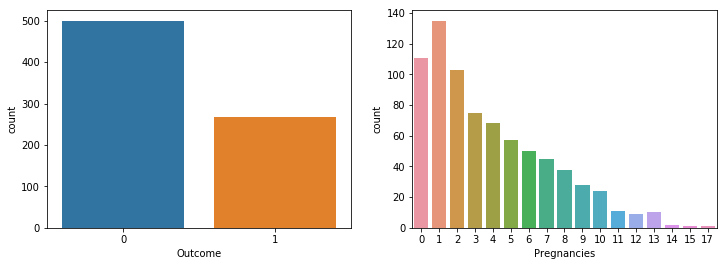

In [10]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Outcome', data=data, ax=axes[0]);
sns.countplot(x='Pregnancies', data=data, ax=axes[1]);

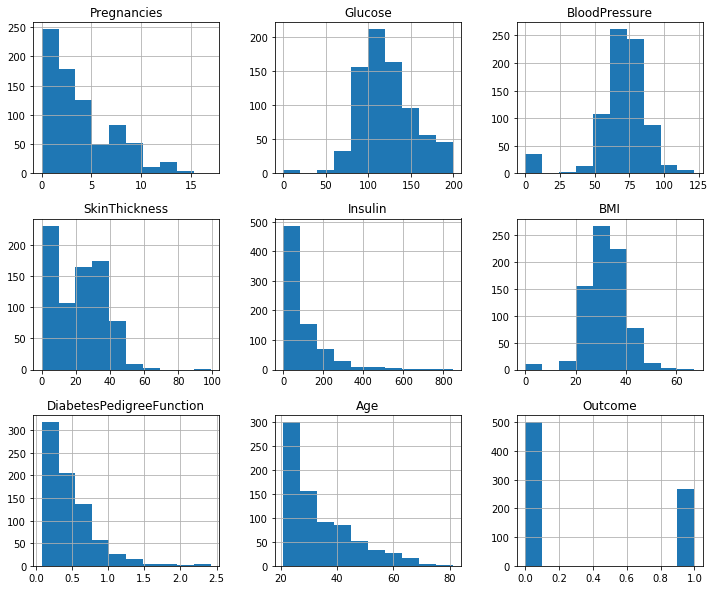

In [11]:

#Plots of all the variables
data.hist(figsize=(12, 10))

plt.show()

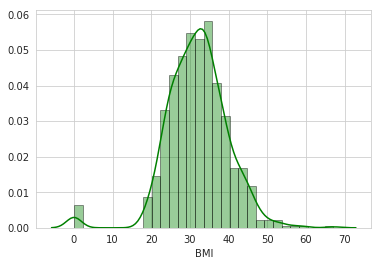

In [12]:
sns.set_style('whitegrid')
#sns.countplot(x='Outcome', hue='Age', data=data)
sns.distplot(data['BMI'], kde=True, bins=30, color='Green',
            hist_kws={'edgecolor':'black'})

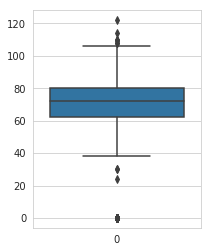

In [13]:

#BP plot
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=data['BloodPressure'], ax=ax);

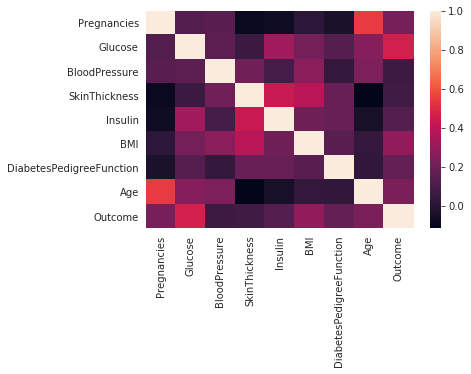

In [14]:
#look at the correlations among the numerical variables in our dataset. 
#This information is important to know as logistic regression does not handle highly correlated input variables well
#brighter colors indicate more correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix);

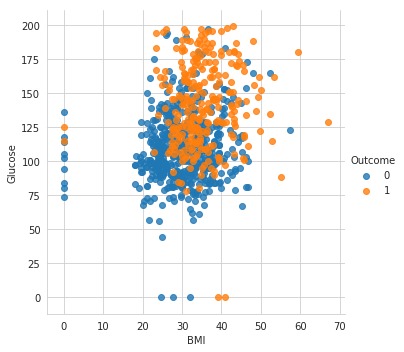

In [15]:
# Plot of BMI vs Glocose with Outcomes highlighted
sns.lmplot('BMI', 'Glucose', data=data, 
           hue='Outcome', fit_reg=False);

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
346,1,139,46,19,83,28.7,0.654,22
750,4,136,70,0,0,31.2,1.182,22
122,2,107,74,30,100,33.6,0.404,23
552,6,114,88,0,0,27.8,0.247,66


In [17]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

In [18]:
lm = LogisticRegression(max_iter=max_iter,l1_ratio=l1_ratio)
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       103
           1       0.73      0.53      0.61        51

    accuracy                           0.78       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


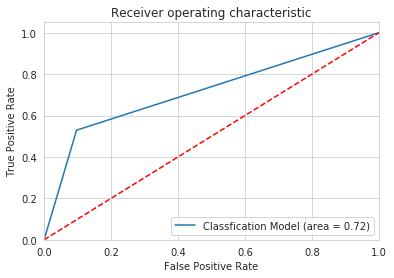

In [19]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Classfication Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('/mnt/artifacts/Log_ROC')
plt.show()

In [20]:
!ls -l /mnt/artifacts/results/

total 4
-rw-r--r-- 1 ubuntu ubuntu 2846 Feb  8 10:37 stdout.txt
